In [9]:
# 15・1・1
from collections import Counter
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

def get_text_from_gutenberg(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    text = soup.get_text()
    start = text.find("*** START")
    end = text.find("*** END")
    return text[start:end]



In [ ]:
# 15・1・2
# --- テキスト取得 ---
"""
url_sha = "https://www.gutenberg.org/files/1524/1524-h/1524-h.htm"  # Hamlet by Shakespeare :contentReference[oaicite:1]{index=1}
url_mar = "https://www.gutenberg.org/files/779/779-h/779-h.htm"    # Doctor Faustus by Marlowe :contentReference[oaicite:2]{index=2}

text_sha = get_text_from_gutenberg(url_sha)
text_mar = get_text_from_gutenberg(url_mar)
"""
with open("hamlet.txt", "r") as f:
    text_sha = f.read()

with open("doctor_faustus.txt", "r") as f:
    text_mar = f.read()


In [19]:
#with open('hamlet.txt', 'w') as f:
#    f.write(text_sha)

with open('doctor_faustus.txt', 'w') as f:
    f.write(text_mar)


In [ ]:
# 15・1・3
import string
def tokenize(text):
    # 単語リスト作成関数
    text = text.lower()
    text = text.translate(str.maketrans("", "", string.punctuation))
    return text.split()

words_sha = tokenize(text_sha)
words_mar = tokenize(text_mar)

In [7]:
# --- 上位単語20件取得 ---
cnt_sha = Counter(words_sha).most_common(20)
cnt_mar = Counter(words_mar).most_common(20)


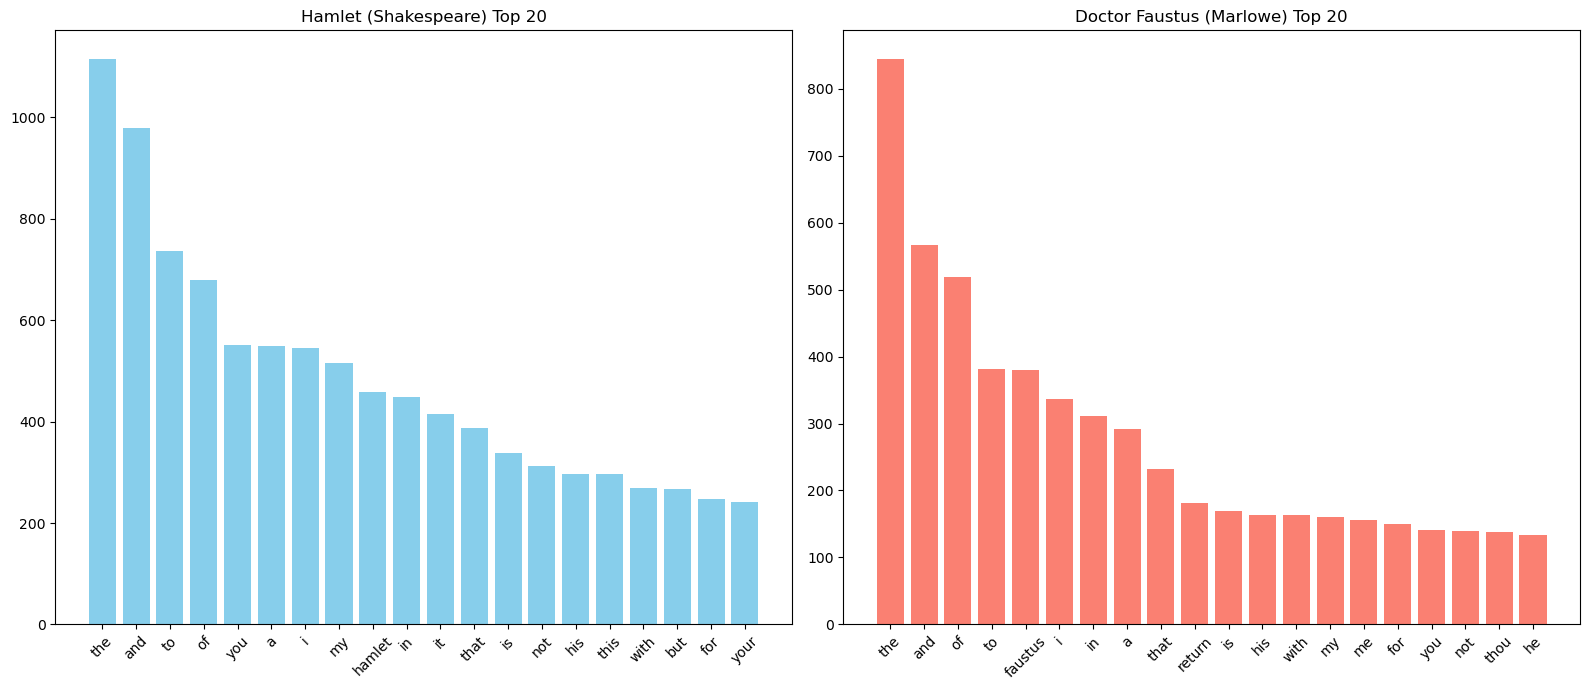

In [8]:
# --- グラフ表示 ---
words_s, counts_s = zip(*cnt_sha)
words_m, counts_m = zip(*cnt_mar)

fig, axes = plt.subplots(1, 2, figsize=(16, 7))
axes[0].bar(words_s, counts_s, color='skyblue')
axes[0].set_title("Hamlet (Shakespeare) Top 20")
axes[0].tick_params(axis='x', rotation=45)

axes[1].bar(words_m, counts_m, color='salmon')
axes[1].set_title("Doctor Faustus (Marlowe) Top 20")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()